In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

## Take a Quiek Loot

In [113]:
df = pd.read_csv('income.csv')

In [114]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [115]:
# New Columns Names
columns_names_mapping = {
    'workclass' : 'work_class',
    'fnlwgt' : 'final_weight',
    'education.num' : 'education_num',
    'marital.status' : 'marital_status',
    'capital.gain' : 'capital_gain',
    'capital.loss' : 'capital_loss',
    'hours.per.week' : 'hours_per_week',
    'native.country' : 'native_country'
}

In [116]:
# Rename Columns
df.rename(columns = columns_names_mapping, inplace = True)

In [117]:
df.columns

Index(['age', 'work_class', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [118]:
df.shape

(25000, 15)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   work_class      25000 non-null  object
 2   final_weight    25000 non-null  int64 
 3   education       25000 non-null  object
 4   education_num   25000 non-null  int64 
 5   marital_status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital_gain    25000 non-null  int64 
 11  capital_loss    25000 non-null  int64 
 12  hours_per_week  25000 non-null  int64 
 13  native_country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


# Exploratory Data Analysis :

### Explore the Relationship Between Income (Target) and Categorical Features

In [120]:
# Define Function to Plot The Relationship Between Income and (inputs)
def custom_plot(x):    
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[x], hue=df['income'], data=df)
    plt.title(f'Distribution of {x} based on income')
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

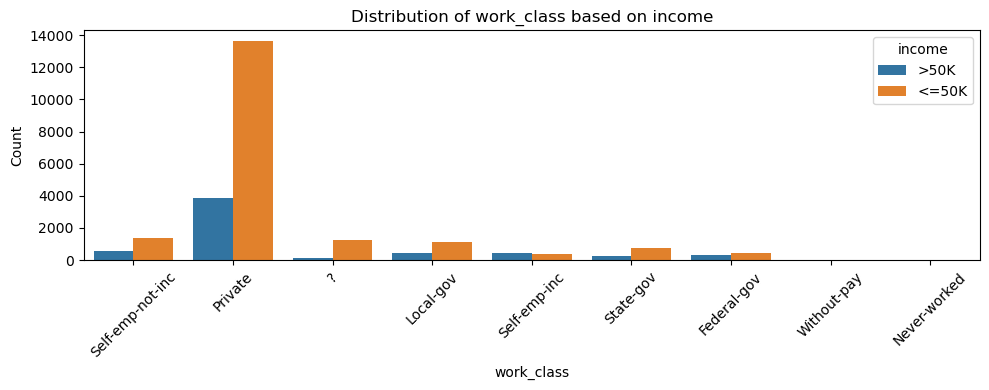

In [121]:
custom_plot('work_class')

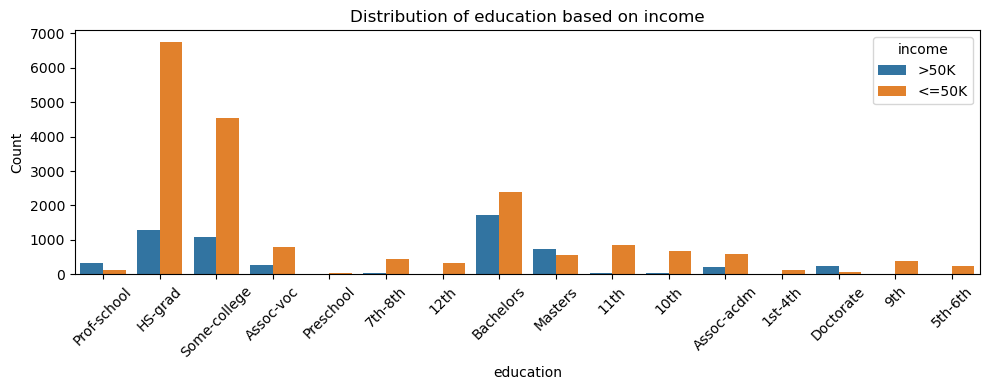

In [122]:
custom_plot('education')

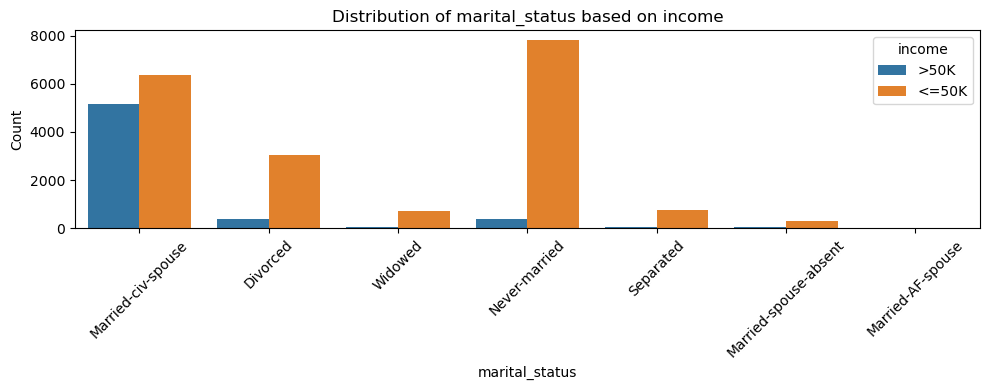

In [123]:
custom_plot('marital_status')

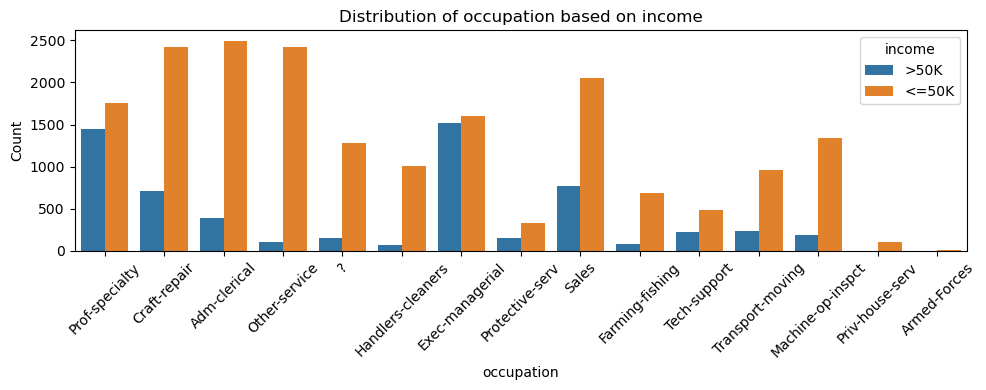

In [124]:
custom_plot('occupation')

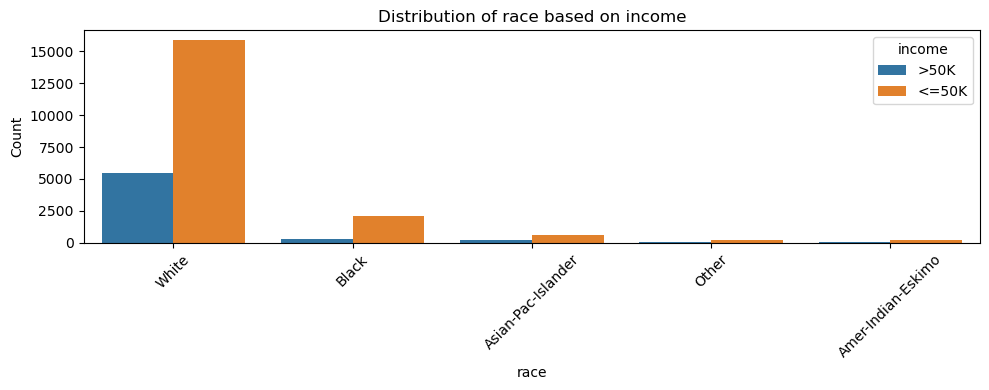

In [125]:
custom_plot('race')

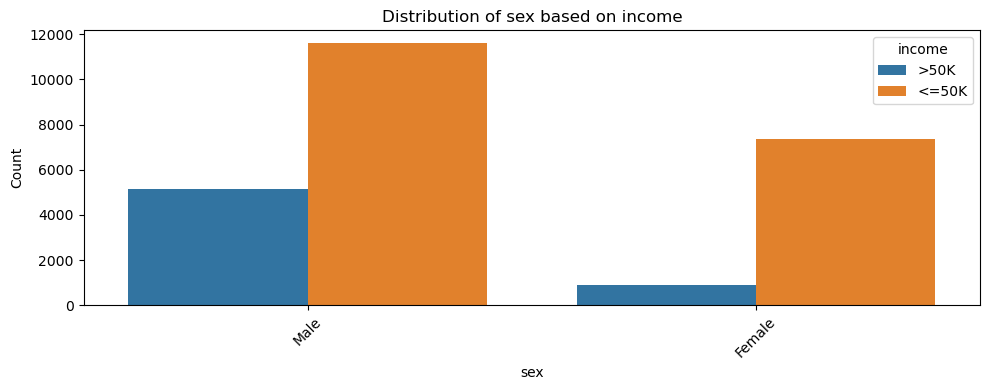

In [126]:
custom_plot('sex')

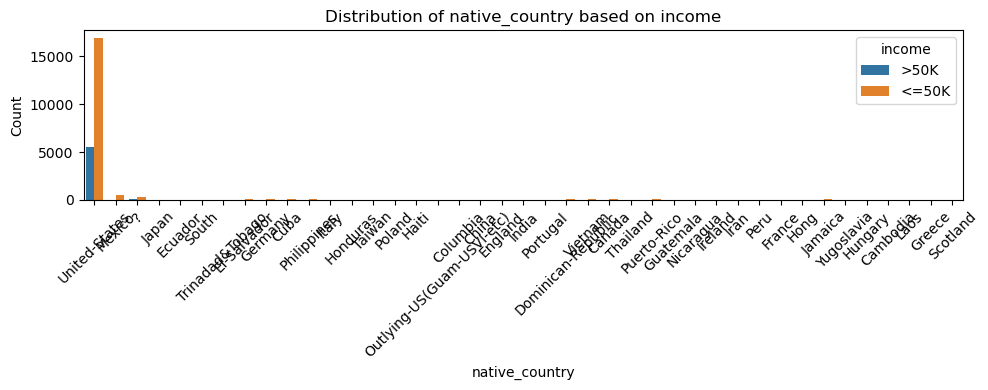

In [127]:
custom_plot('native_country')

## Explore Numerical Features

In [128]:
num_columns = ['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

### Distribution of num Columns

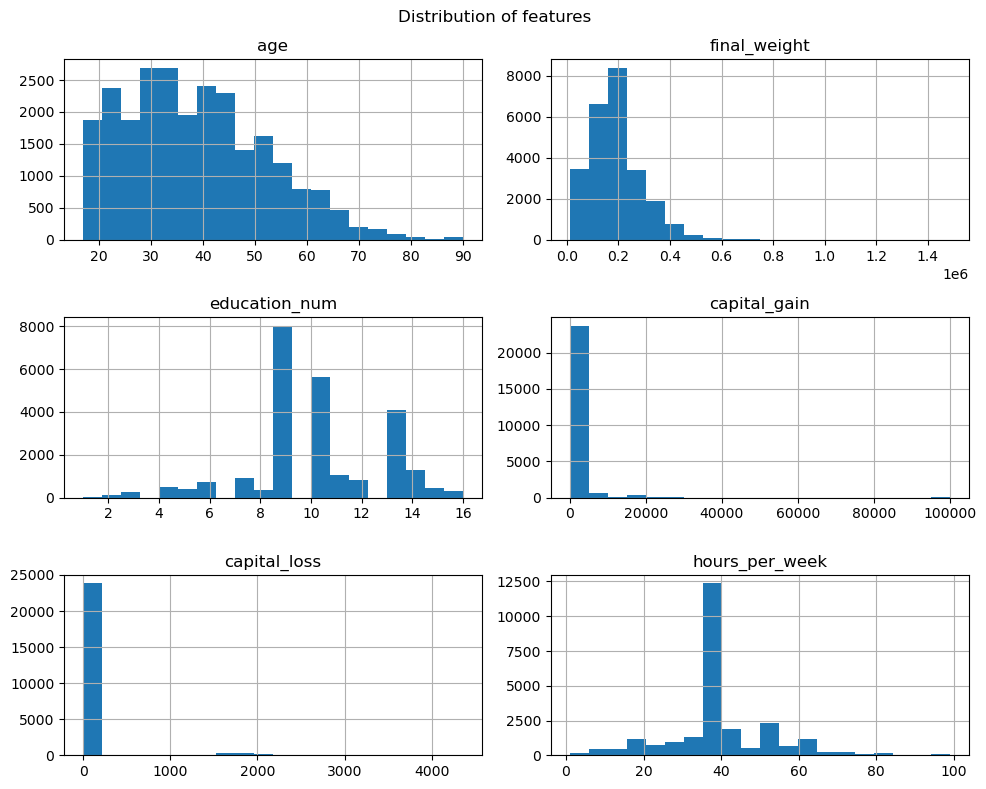

In [129]:
df[num_columns].hist(bins = 20, figsize = (10, 8))
plt.suptitle('Distribution of features')
plt.tight_layout()
plt.show();

### Display the Spread Based on Income and Check for Outliers

In [130]:
# Define function for Box plots for numeric features grouped by 'income'
def custom_plot2(i):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[i], y=df['income'], data=df)
    plt.title(f'{i} distribution based on income')
    plt.show()

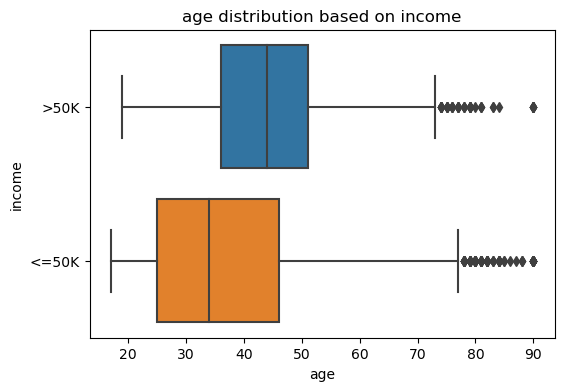

In [131]:
custom_plot2('age')

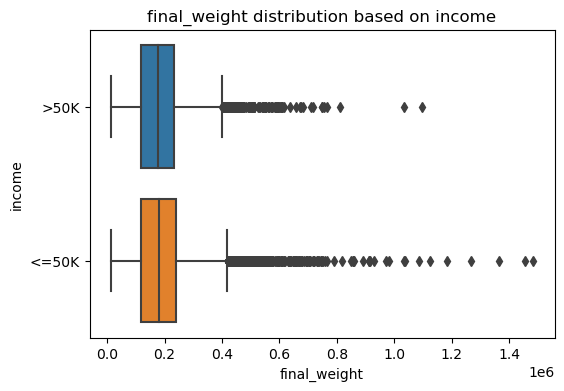

In [132]:
custom_plot2('final_weight')

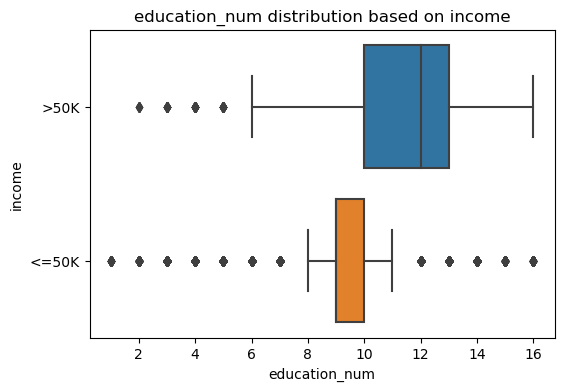

In [133]:
custom_plot2('education_num')

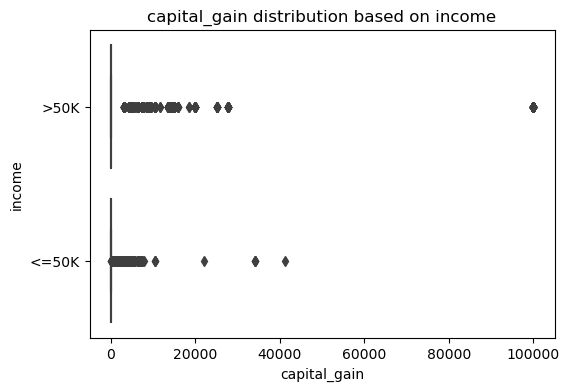

In [134]:
custom_plot2('capital_gain')

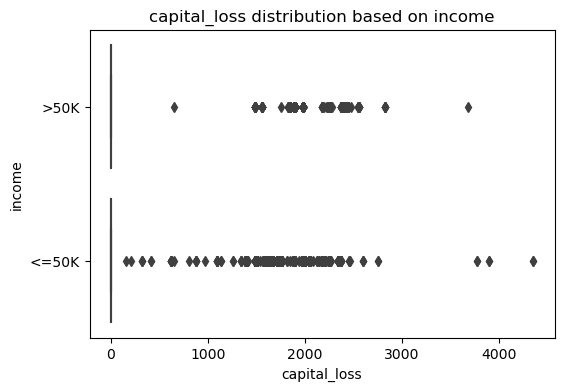

In [135]:
custom_plot2('capital_loss')

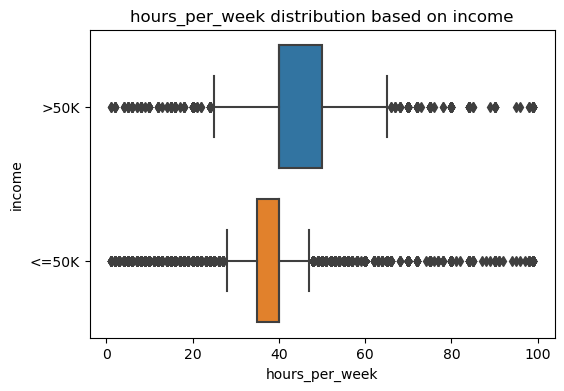

In [136]:
custom_plot2('hours_per_week')

# Split Data

In [137]:
X = df.drop(columns = 'income')
y = df['income']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [139]:
y_train.value_counts()

<=50K    15200
>50K      4800
Name: income, dtype: int64

In [140]:
# Convert target variable to binary format
label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train)
y_test_binary = label_encoder.transform(y_test)

In [141]:
# Calculate class weights based on the updated target variable y_train_binary
class_counts = np.bincount(y_train_binary)
total_samples = len(y_train_binary)
class_weights = {class_idx: total_samples / count for class_idx, count in enumerate(class_counts)}

# Data Preprocessing

### Dealing with Nulls

In [142]:
# Check for Nulls
X_train.isnull().sum()

age               0
work_class        0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [143]:
X_test.isnull().sum()

age               0
work_class        0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

### Dealing with Duplictes

In [144]:
# Check for Duplicates
X_train.duplicated().sum()

8

In [145]:
X_test.duplicated().sum()

0

### Dealing with Un known Categories

In [146]:
# Replace "?" with the most frequent category in the 'work_class' column
most_frequent_category = X_train['work_class'].mode()[0]
X_train['work_class'].replace('?', most_frequent_category, inplace=True)

most_frequent_category = X_test['work_class'].mode()[0]
X_test['work_class'].replace('?', most_frequent_category, inplace=True)

In [147]:
# Replace "?" with the most frequent category in the 'occupation' column
most_frequent_category = X_train['occupation'].mode()[0]
X_train['occupation'].replace('?', most_frequent_category, inplace=True)

most_frequent_category = X_test['occupation'].mode()[0]
X_test['occupation'].replace('?', most_frequent_category, inplace=True)

In [148]:
# Replace "?" with the most frequent category in the 'native_country' column
most_frequent_category = X_train['native_country'].mode()[0]
X_train['native_country'].replace('?', most_frequent_category, inplace=True)

most_frequent_category = X_test['native_country'].mode()[0]
X_test['native_country'].replace('?', most_frequent_category, inplace=True)

### Encoding Categorical Variables

In [149]:
# Use the pandas get_dummies() function for One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train, columns=['work_class', 'education', 'marital_status', 'occupation',
                                                  'relationship', 'race', 'sex', 'native_country'])

In [150]:
X_test_encoded = pd.get_dummies(X_test, columns=['work_class', 'education', 'marital_status', 'occupation',
                                                  'relationship', 'race', 'sex', 'native_country'])

In [151]:
# Reindex the test set to match the columns in the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Build The Model

In [152]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)

In [153]:
# Fit the model to the training data
rf_model.fit(X_train_encoded, y_train_binary)

RandomForestClassifier(class_weight={0: 1.3157894736842106,
                                     1: 4.166666666666667},
                       random_state=42)

### Evaluate the Model

In [154]:
# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(rf_model, X_train_encoded, y_train_binary, cv=3, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.85690715 0.85450727 0.85238524]
Mean accuracy: 0.8545998892674628


In [155]:
# Predict using the trained model
y_pred = rf_model.predict(X_test_encoded)

# Evaluate the model's performance using classification metrics
print("Classification Report:")
print(classification_report(y_test_binary, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3755
           1       0.74      0.62      0.68      1245

    accuracy                           0.85      5000
   macro avg       0.81      0.78      0.79      5000
weighted avg       0.85      0.85      0.85      5000



## Hyperparameter Tuning- RandomizedSearchCV

In [156]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}


In [157]:
# Perform Randomized Search with Cross-Validation to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=3,
                                   random_state=42)
random_search.fit(X_train_encoded, y_train_binary)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 1.3157894736842106,
                                                                  1: 4.166666666666667},
                                                    random_state=42),
                   param_distributions={'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'n_estimators': [25, 50, 100, 150]},
                   random_state=42)

In [158]:
# Extract the best parameters from the random search
best_params = random_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'n_estimators': 150, 'max_leaf_nodes': 6, 'max_features': None, 'max_depth': 6}


In [159]:
# Create the best model using the best hyperparameters
best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                   max_features=best_params['max_features'],
                                   max_depth=best_params['max_depth'],
                                   max_leaf_nodes=best_params['max_leaf_nodes'])


In [160]:
# Fit the best model to the training data
best_model.fit(X_train_encoded, y_train_binary)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=6,
                       n_estimators=150)

In [161]:
# Predict using the best model on the test data
y_pred_best = best_model.predict(X_test_encoded)

In [162]:
# Evaluate the best model's performance using classification metrics
print("Classification Report for Best Model:")
print(classification_report(y_test_binary, y_pred_best))

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3755
           1       0.73      0.58      0.64      1245

    accuracy                           0.84      5000
   macro avg       0.80      0.75      0.77      5000
weighted avg       0.83      0.84      0.83      5000



## Visualize the Results

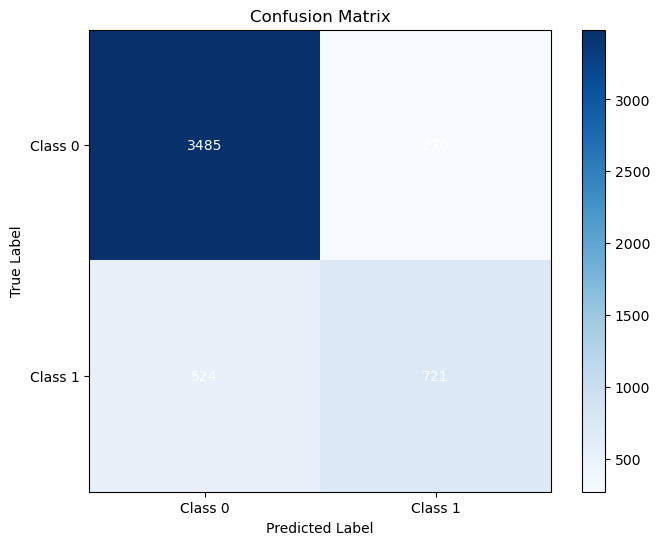

In [163]:
cm = confusion_matrix(y_test_binary, y_pred_best)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')

plt.show()

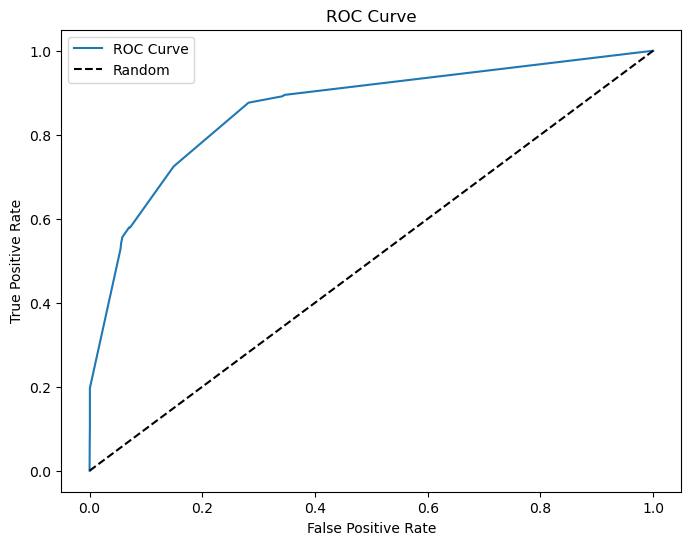

In [164]:
# ROC Curve
y_prob = best_model.predict_proba(X_test_encoded)[:, 1]  # Probability of Class 1
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()